# Gaussian Mixture Models


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = [6,6]
sns.set()

In [3]:
data = np.array([-0.39, 0.12, 0.94, 1.67, 1.76, 2.44, 3.72, 4.28, 4.92, 5.53,
0.06, 0.48, 1.01, 1.68, 1.80, 3.25, 4.12, 4.60, 5.28, 6.22]).reshape(-1, 1)

In [4]:
data

array([[-0.39],
       [ 0.12],
       [ 0.94],
       [ 1.67],
       [ 1.76],
       [ 2.44],
       [ 3.72],
       [ 4.28],
       [ 4.92],
       [ 5.53],
       [ 0.06],
       [ 0.48],
       [ 1.01],
       [ 1.68],
       [ 1.8 ],
       [ 3.25],
       [ 4.12],
       [ 4.6 ],
       [ 5.28],
       [ 6.22]])

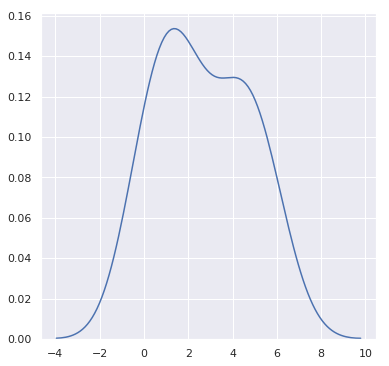

In [5]:
sns.kdeplot(data.ravel());

# Initialize

In [6]:
K = 2

In [7]:
N = len(data)
N

20

In [34]:
np.random.permutation(data)

array([[-0.39],
       [ 1.01],
       [ 3.72],
       [ 4.6 ],
       [ 1.8 ],
       [ 1.76],
       [ 5.53],
       [ 2.44],
       [ 0.94],
       [ 0.48],
       [ 4.92],
       [ 4.12],
       [ 4.28],
       [ 3.25],
       [ 0.06],
       [ 1.68],
       [ 0.12],
       [ 6.22],
       [ 5.28],
       [ 1.67]])

In [43]:
mu = np.random.permutation(data)[:K].ravel()
mu

array([3.25, 4.12])

In [51]:
data

array([[-0.39],
       [ 0.12],
       [ 0.94],
       [ 1.67],
       [ 1.76],
       [ 2.44],
       [ 3.72],
       [ 4.28],
       [ 4.92],
       [ 5.53],
       [ 0.06],
       [ 0.48],
       [ 1.01],
       [ 1.68],
       [ 1.8 ],
       [ 3.25],
       [ 4.12],
       [ 4.6 ],
       [ 5.28],
       [ 6.22]])

[0.5, 0.5]

In [9]:
sigma = np.array([np.var(data)] * K)
sigma

array([3.96777475, 3.96777475])

In [10]:
pi = np.array([1/K] * K)
pi

array([0.5, 0.5])

# Normal distribution density function

In [11]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

In [12]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

# Visualize

In [13]:
def plot_gmm(data, mu, sigma, K=2):
    max_sigma = sigma.max()
    x = np.linspace(data.min()-1*max_sigma, data.max()+1*max_sigma, num=100)
    plt.figure(figsize=(7, 5))
    sns.distplot(data, kde=False, rug=True, bins=20, norm_hist=True,)
    # plt.hist(data, bins=20, density=True)
    for i in range(K):
        plt.plot(x, univariate_normal(x, mean=mu[i], variance=sigma[i]), 
            label="$\mathcal{N}$" + "({mu}, {sigma})".format(mu=str(mu[i].round(2)), sigma=str(sigma[i].round(2))))
    plt.xlabel('$x$', fontsize=13)
    plt.ylabel('Probability Density: $p(x)$', fontsize=13)
    plt.title('Univariate Normal Distributions')
    plt.legend(loc=1)
    plt.show()


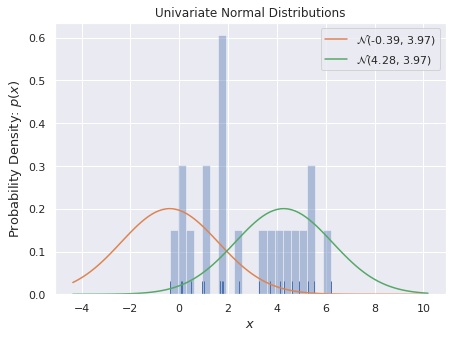

In [14]:
plot_gmm(data, mu, sigma, K)

In [15]:
prob = np.zeros((data.shape[0], 2))
prob

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

# Expectation

In [63]:
prob[:, 0] = univariate_normal(data, mean=mu[0], variance=sigma[0]).ravel()
prob[:, 1] = univariate_normal(data, mean=mu[1], variance=sigma[1]).ravel()

In [64]:
prob = univariate_normal(data, mean=mu, variance=sigma)

In [65]:
prob

array([[0.03771519, 0.01543368],
       [0.05827397, 0.02666817],
       [0.10223604, 0.05600258],
       [0.14622253, 0.09400121],
       [0.15140338, 0.09927161],
       [0.18438675, 0.14033728],
       [0.19478128, 0.19628184],
       [0.17521687, 0.19963447],
       [0.14093097, 0.18476122],
       [0.10402555, 0.15589507],
       [0.05555484, 0.02509151],
       [0.07615813, 0.03771519],
       [0.10642283, 0.05919767],
       [0.14680411, 0.09458225],
       [0.15366379, 0.10164128],
       [0.20027953, 0.18205942],
       [0.18205942, 0.20027953],
       [0.15918249, 0.19454824],
       [0.11915414, 0.16904213],
       [0.06590052, 0.11489135]])

In [19]:
pi

array([0.5, 0.5])

In [70]:
a = prob * pi
a

array([[0.01885759, 0.00771684],
       [0.02913699, 0.01333408],
       [0.05111802, 0.02800129],
       [0.07311127, 0.04700061],
       [0.07570169, 0.04963581],
       [0.09219337, 0.07016864],
       [0.09739064, 0.09814092],
       [0.08760844, 0.09981724],
       [0.07046548, 0.09238061],
       [0.05201277, 0.07794754],
       [0.02777742, 0.01254576],
       [0.03807907, 0.01885759],
       [0.05321141, 0.02959884],
       [0.07340206, 0.04729113],
       [0.0768319 , 0.05082064],
       [0.10013976, 0.09102971],
       [0.09102971, 0.10013976],
       [0.07959125, 0.09727412],
       [0.05957707, 0.08452106],
       [0.03295026, 0.05744568]])

In [71]:
b = np.sum(prob * pi, axis=1, keepdims=True)
b

array([[0.02657443],
       [0.04247107],
       [0.07911931],
       [0.12011187],
       [0.1253375 ],
       [0.16236202],
       [0.19553156],
       [0.18742567],
       [0.1628461 ],
       [0.12996031],
       [0.04032317],
       [0.05693666],
       [0.08281025],
       [0.12069318],
       [0.12765253],
       [0.19116947],
       [0.19116947],
       [0.17686536],
       [0.14409813],
       [0.09039594]])

In [72]:
responsibility = a / b
responsibility

array([[0.70961417, 0.29038583],
       [0.68604316, 0.31395684],
       [0.64608779, 0.35391221],
       [0.60869308, 0.39130692],
       [0.60398278, 0.39601722],
       [0.567826  , 0.432174  ],
       [0.49808143, 0.50191857],
       [0.46743029, 0.53256971],
       [0.43271215, 0.56728785],
       [0.40022045, 0.59977955],
       [0.68886984, 0.31113016],
       [0.66879699, 0.33120301],
       [0.64257037, 0.35742963],
       [0.60817069, 0.39182931],
       [0.60188304, 0.39811696],
       [0.52382717, 0.47617283],
       [0.47617283, 0.52382717],
       [0.45001036, 0.54998964],
       [0.41344789, 0.58655211],
       [0.36451043, 0.63548957]])

# Maximization

### Update mu

In [73]:
np.sum(responsibility * data, axis=0)

array([25.37459301, 28.11540699])

In [74]:
np.sum(responsibility, axis=0)

array([11.05895091,  8.94104909])

In [75]:
mu_new = np.sum(responsibility * data, axis=0) / np.sum(responsibility, axis=0)
mu_new

array([2.29448464, 3.14453111])

### Update sigma

In [76]:
data, mu

(array([[-0.39],
        [ 0.12],
        [ 0.94],
        [ 1.67],
        [ 1.76],
        [ 2.44],
        [ 3.72],
        [ 4.28],
        [ 4.92],
        [ 5.53],
        [ 0.06],
        [ 0.48],
        [ 1.01],
        [ 1.68],
        [ 1.8 ],
        [ 3.25],
        [ 4.12],
        [ 4.6 ],
        [ 5.28],
        [ 6.22]]), array([3.25, 4.12]))

In [77]:
(data-mu)

array([[-3.64, -4.51],
       [-3.13, -4.  ],
       [-2.31, -3.18],
       [-1.58, -2.45],
       [-1.49, -2.36],
       [-0.81, -1.68],
       [ 0.47, -0.4 ],
       [ 1.03,  0.16],
       [ 1.67,  0.8 ],
       [ 2.28,  1.41],
       [-3.19, -4.06],
       [-2.77, -3.64],
       [-2.24, -3.11],
       [-1.57, -2.44],
       [-1.45, -2.32],
       [ 0.  , -0.87],
       [ 0.87,  0.  ],
       [ 1.35,  0.48],
       [ 2.03,  1.16],
       [ 2.97,  2.1 ]])

In [78]:
sigma_new = np.sum((responsibility * (data-mu_new)**2), axis=0)/np.sum(responsibility, axis=0)
sigma_new

array([3.69203577, 3.90928084])

### Update pi

In [79]:
pi_new = np.sum(responsibility, axis=0)/N
pi_new

array([0.55294755, 0.44705245])

### Calculate log-likelihood

In [80]:
# Initial log-likelihood
prob = univariate_normal(data, mean=mu, variance=sigma)
np.sum(np.log(np.sum(pi*prob, axis=1)))
# np.log(responsibility)

-44.622590513369815

In [81]:
# log-likelihood after iteration 1
prob = univariate_normal(data, mean=mu_new, variance=sigma_new)
np.sum(np.log(np.sum(pi_new*prob, axis=1)))

-42.14944216062588

# Put together

In [106]:
data = np.array([-0.39, 0.12, 0.94, 1.67, 1.76, 2.44, 3.72, 4.28, 4.92, 5.53,
0.06, 0.48, 1.01, 1.68, 1.80, 3.25, 4.12, 4.60, 5.28, 6.22]).reshape(-1, 1)
data

array([[-0.39],
       [ 0.12],
       [ 0.94],
       [ 1.67],
       [ 1.76],
       [ 2.44],
       [ 3.72],
       [ 4.28],
       [ 4.92],
       [ 5.53],
       [ 0.06],
       [ 0.48],
       [ 1.01],
       [ 1.68],
       [ 1.8 ],
       [ 3.25],
       [ 4.12],
       [ 4.6 ],
       [ 5.28],
       [ 6.22]])


mu: [5.53 5.28]
sigma: [3.96777475 3.96777475]
pi: [0.5 0.5]



    mu_new: [2.80999519 2.56034684]
    sigma_new: [3.99361417 3.91750719]
    pi_new: [0.4572558 0.5427442]
    
    


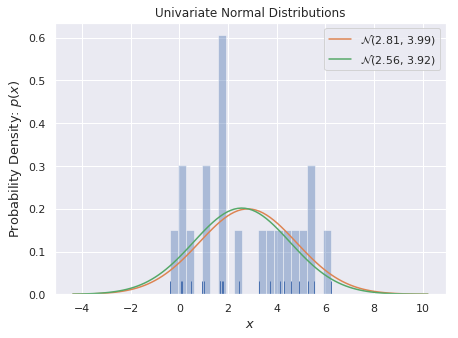


    mu_new: [2.81185191 2.55877856]
    sigma_new: [4.00815602 3.90446679]
    pi_new: [0.45726441 0.54273559]
    
    


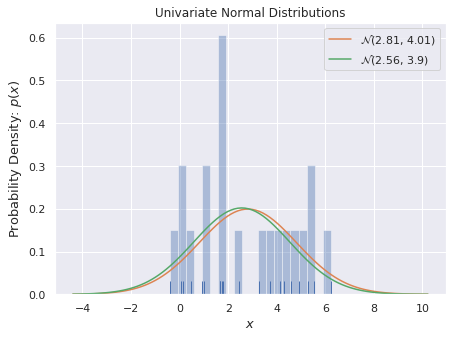


    mu_new: [2.81427204 2.55673313]
    sigma_new: [4.01351104 3.89890945]
    pi_new: [0.45727798 0.54272202]
    
    


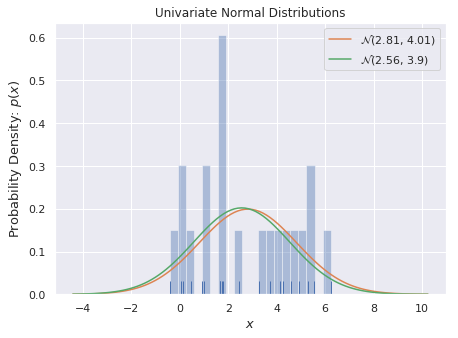

In [92]:
# Initialize
iteration=0

K = 2
N = len(data)
mu = np.random.permutation(data)[:K].ravel()
sigma = np.array([np.var(data)] * K)
pi = np.array([1/K] * K)

#plot_gmm(data, mu, sigma, K)


print("""
mu: {}
sigma: {}
pi: {}

""".format(
    mu,sigma,pi))

# Log likelihood
prob = univariate_normal(data, mean=mu, variance=sigma)
loglik = np.sum(np.log(np.sum(pi*prob, axis=1)))
    
loglik_all = []
loglik_all.append(loglik)

while iteration < 100:
    # Expectation
    prob = univariate_normal(data, mean=mu, variance=sigma)
    responsibility = (prob * pi) / np.sum(prob * pi, axis=1, keepdims=True)
    

    # Maximization
    mu_new = np.sum(responsibility * data, axis=0) / np.sum(responsibility, axis=0)
    sigma_new = np.sum((responsibility * (data-mu_new)**2), axis=0)/np.sum(responsibility, axis=0)
    pi_new = np.sum(responsibility, axis=0)/N
    
    print("""
    mu_new: {}
    sigma_new: {}
    pi_new: {}
    
    """.format(
        mu_new,sigma_new,pi_new))
    
    # Log likelihood
    prob = univariate_normal(data, mean=mu_new, variance=sigma_new)
    loglik = np.sum(np.log(np.sum(pi_new*prob, axis=1)))

    loglik_all.append(loglik)
    
    # Assign updated parameters
    mu = mu_new
    sigma = sigma_new
    pi = pi_new
    
    # Plot Gaussians
    plot_gmm(data, mu, sigma, K)

    iteration+=1
    
    if loglik_all[-1] - loglik_all[-2] < 0.0001:
        break;

In [108]:
loglik_all

[-58.991734068620225, -42.16078498760664, -42.160778720087045]

# Test

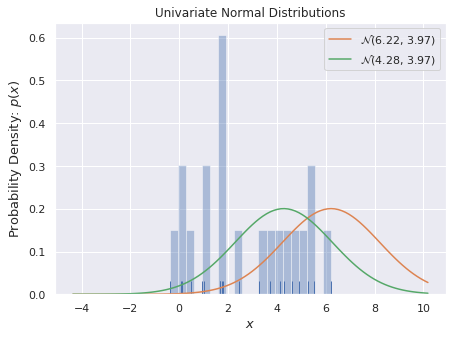

In [82]:
K = 2
N = len(data)
mu = np.random.permutation(data)[:K].ravel()
sigma = np.array([np.var(data)] * K)
pi = np.array([1/K] * K)

plot_gmm(data, mu, sigma, K)

In [83]:
np.array([1/K] * K)

array([0.5, 0.5])

In [ ]:
# Initialize


K = 2
N = len(data)
mu = np.random.permutation(data)[:K].ravel()
sigma = np.array([np.var(data)] * K)
pi = np.array([1/K] * K)

plot_gmm(data, mu, sigma, K)


# Log likelihood
prob = univariate_normal(data, mean=mu, variance=sigma)
loglik = np.sum(np.log(np.sum(pi*prob, axis=1)))

# Reference


- http://statweb.stanford.edu/~tibs/sta306bfiles/mixtures-em.pdf

- http://statweb.stanford.edu/~tibs/stat315a/LECTURES/em.pdf